## Deep learning on Be heart Smart

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


## Creating Connection to Be Heart Smart Db

In [2]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

In [3]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_complete_df = pd.read_sql("SELECT * FROM final_cardio_bmi_complete",engine)
cardio_complete_df.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease,bmi,weight_status,obesity_status
0,26503.0,49.0,1.0,160.0,30.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,11.7,underweight,no
1,54851.0,59.0,1.0,154.0,32.0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0,13.5,underweight,no
2,21040.0,62.0,1.0,143.0,34.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,16.6,underweight,no
3,47872.0,57.0,1.0,153.0,34.0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0,14.5,underweight,no
4,23318.0,59.0,1.0,165.0,35.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,12.9,underweight,no


In [4]:
print(cardio_complete_df.shape)
print(cardio_complete_df.dtypes)

(68571, 16)
id                float64
age               float64
gender            float64
height            float64
weight            float64
systolic_bp       float64
diastolic_bp      float64
cholesterol       float64
glucose           float64
smoker            float64
alcohol_intake    float64
active            float64
cardio_disease    float64
bmi               float64
weight_status      object
obesity_status     object
dtype: object


In [5]:
# Re-aarange columns in the merged DataFrame
rearranged_columns = ["id", "age", "gender", "height", "weight", "bmi", "weight_status", "obesity_status", 
                       "systolic_bp", "diastolic_bp", "cholesterol", "glucose", "smoker", "alcohol_intake", 
                       "active", "cardio_disease"]
cardio_complete_df = cardio_complete_df[rearranged_columns]
cardio_complete_df.head()

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,26503.0,49.0,1.0,160.0,30.0,11.7,underweight,no,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
1,54851.0,59.0,1.0,154.0,32.0,13.5,underweight,no,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
2,21040.0,62.0,1.0,143.0,34.0,16.6,underweight,no,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47872.0,57.0,1.0,153.0,34.0,14.5,underweight,no,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0
4,23318.0,59.0,1.0,165.0,35.0,12.9,underweight,no,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0


In [6]:
cardio_complete_df.describe()

,id,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
count,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000
mean,49969.918449,52.826851,1.348617,164.449082,74.104387,27.433252,126.597862,81.290400,1.364586,1.225693,0.087967,0.053405,0.803386,0.494422
std,28845.783263,6.769422,0.476536,7.824401,14.277474,5.194751,16.636288,9.389204,0.678826,0.571645,0.283249,0.224840,0.397441,0.499973
min,0.000000,29.000000,1.000000,135.000000,29.000000,9.900000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.500000,48.000000,1.000000,159.000000,65.000000,23.900000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50010.000000,53.000000,1.000000,165.000000,72.000000,26.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74857.500000,58.000000,2.000000,170.000000,82.000000,30.100000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,207.000000,200.000000,85.800000,240.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Change the continuous variables weight_status, and obesity_status from string to numeric.
# Defining a function string_to_numeric.
def string_to_numeric(variable):
    if variable == "underweight":
        return 1
    elif variable == "normal":
        return 2
    elif variable == "overweight":
        return 3
    else:
        return 4

In [8]:
# Call the function string_to_numeric on column weight_status 
cardio_complete_df["weight_status"] = cardio_complete_df["weight_status"].apply(string_to_numeric)
cardio_complete_df.head()

# Change the obesity_status to numeric
cardio_complete_df["obesity_status"] = cardio_complete_df["obesity_status"].apply(lambda x: 1 if x == "yes" else 0)

In [9]:
cardio_complete_df.head(10)

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,26503.0,49.0,1.0,160.0,30.0,11.7,1,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
1,54851.0,59.0,1.0,154.0,32.0,13.5,1,0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
2,21040.0,62.0,1.0,143.0,34.0,16.6,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47872.0,57.0,1.0,153.0,34.0,14.5,1,0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0
4,23318.0,59.0,1.0,165.0,35.0,12.9,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
5,45814.0,43.0,1.0,143.0,36.0,17.6,1,0,90.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
6,48322.0,61.0,1.0,145.0,36.0,17.1,1,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
7,69417.0,56.0,1.0,144.0,36.0,17.4,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
8,27965.0,58.0,1.0,152.0,38.0,16.4,1,0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
9,93697.0,52.0,1.0,147.0,38.0,17.6,1,0,100.0,70.0,3.0,3.0,0.0,0.0,1.0,0.0


In [10]:
cardio_complete_df.sample(10)

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
27427,24219.0,57.0,2.0,170.0,85.0,29.4,3,1,140.0,80.0,3.0,1.0,0.0,0.0,1.0,1.0
13007,16763.0,54.0,1.0,161.0,62.0,23.9,2,0,120.0,80.0,1.0,2.0,1.0,0.0,1.0,1.0
1327,89129.0,41.0,2.0,162.0,53.0,20.2,2,0,150.0,100.0,1.0,3.0,0.0,0.0,1.0,1.0
45899,6420.0,54.0,1.0,160.0,68.0,26.6,3,0,130.0,90.0,1.0,2.0,0.0,0.0,1.0,0.0
57373,13778.0,54.0,1.0,168.0,70.0,24.8,2,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
47206,96967.0,39.0,1.0,161.0,62.0,23.9,2,0,90.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
32963,54407.0,58.0,2.0,178.0,102.0,32.2,4,1,120.0,80.0,1.0,1.0,0.0,1.0,1.0,1.0
38332,87459.0,47.0,1.0,163.0,59.0,22.2,2,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
51922,33963.0,43.0,1.0,165.0,60.0,22.0,2,0,120.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
9869,9686.0,56.0,1.0,158.0,92.0,36.9,4,1,140.0,90.0,1.0,2.0,0.0,0.0,0.0,1.0


In [11]:
cardio_complete_df["obesity_status"].value_counts()

0    47334
1    21237
Name: obesity_status, dtype: int64

## Pre processing data for Neural Network

In [12]:
# Drop the non-beneficial ID , height columns.
cardio_processed_df = cardio_complete_df.drop(["id","height"], axis =1)
cardio_processed_df.head()

,age,gender,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,49.0,1.0,30.0,11.7,1,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
1,59.0,1.0,32.0,13.5,1,0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
2,62.0,1.0,34.0,16.6,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
3,57.0,1.0,34.0,14.5,1,0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0
4,59.0,1.0,35.0,12.9,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
X = cardio_processed_df.drop(["cardio_disease"],1).values
y = cardio_processed_df["cardio_disease"].values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51428, 13)
(17143, 13)
(51428,)
(17143,)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Trial 3 with 5 hidden layers and optimizer as "rmsprop"

In [15]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 700)               9800      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               350500    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 485,701
Trainable params: 485,701
Non-trainable params: 0
__________________________________________________

In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1608/1608 [==============================] - 8s 5ms/step - loss: 0.5606 - accuracy: 0.7269
Epoch 2/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5520 - accuracy: 0.7309
Epoch 3/100
1608/1608 [==============================] - 8s 5ms/step - loss: 0.5493 - accuracy: 0.7341
Epoch 4/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5476 - accuracy: 0.7348
Epoch 5/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5470 - accuracy: 0.7336
Epoch 6/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5463 - accuracy: 0.7347
Epoch 7/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5463 - accuracy: 0.7346
Epoch 8/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5467 - accuracy: 0.7333
Epoch 9/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5458 - accuracy: 0.7347
Epoch 10/100
1608/1608 [==============================] - 7s 5ms/step - l

1608/1608 [==============================] - 7s 5ms/step - loss: 0.5550 - accuracy: 0.7374
Epoch 80/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5562 - accuracy: 0.7375
Epoch 81/100
1608/1608 [==============================] - 7s 5ms/step - loss: 0.5558 - accuracy: 0.7357
Epoch 82/100
1608/1608 [==============================] - 8s 5ms/step - loss: 0.5570 - accuracy: 0.7374
Epoch 83/100
1608/1608 [==============================] - 8s 5ms/step - loss: 0.5594 - accuracy: 0.7376
Epoch 84/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5563 - accuracy: 0.7383
Epoch 85/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5579 - accuracy: 0.7377
Epoch 86/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5559 - accuracy: 0.7390
Epoch 87/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5567 - accuracy: 0.7381
Epoch 88/100
1608/1608 [==============================] - 7s 4ms/step - loss:

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

536/536 - 0s - loss: 0.6356 - accuracy: 0.7273
Loss: 0.636, Accuracy: 0.727


## "The accuracy of this model is 73.0% after adding additional neurons to each of the 5 hidden layers"

## The best accuracy is obtained with 5 hidden layers, activation: relu , output:sigmoid and optimizer ="rmsprop"

In [21]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 700)               9800      
_________________________________________________________________
dense_7 (Dense)              (None, 500)               350500    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 485,701
Trainable params: 485,701
Non-trainable params: 0
________________________________________________

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5606 - accuracy: 0.7264
Epoch 2/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5522 - accuracy: 0.7313
Epoch 3/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5492 - accuracy: 0.7338
Epoch 4/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5472 - accuracy: 0.7328
Epoch 5/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5466 - accuracy: 0.7339
Epoch 6/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5459 - accuracy: 0.7336
Epoch 7/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5454 - accuracy: 0.7349
Epoch 8/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5455 - accuracy: 0.7348
Epoch 9/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5450 - accuracy: 0.7347
Epoch 10/100
1608/1608 [==============================] - 7s 4ms/step - l

1608/1608 [==============================] - 7s 5ms/step - loss: 0.5491 - accuracy: 0.7387
Epoch 80/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5475 - accuracy: 0.7401
Epoch 81/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5468 - accuracy: 0.7410
Epoch 82/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5465 - accuracy: 0.7422
Epoch 83/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5451 - accuracy: 0.7416
Epoch 84/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5442 - accuracy: 0.7412
Epoch 85/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5457 - accuracy: 0.7399
Epoch 86/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5492 - accuracy: 0.7409
Epoch 87/100
1608/1608 [==============================] - 7s 4ms/step - loss: 0.5478 - accuracy: 0.7414
Epoch 88/100
1608/1608 [==============================] - 7s 4ms/step - loss:

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

536/536 - 0s - loss: 0.5818 - accuracy: 0.7263
Loss: 0.582, Accuracy: 0.726


<AxesSubplot:>

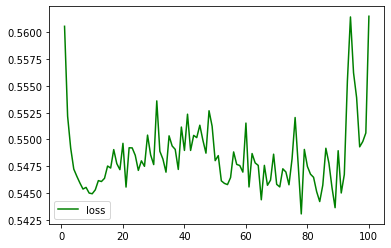

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss",color='green')

<AxesSubplot:>

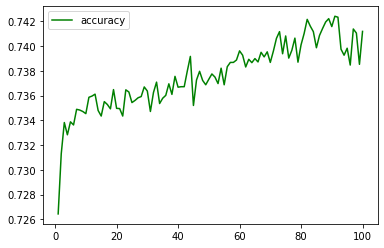

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy",color='green')

In [36]:
from ann_visualizer.visualize import ann_viz;
from graphviz import Source

In [37]:
ann_viz(nn,title ="Be Heart Smart Neural Network Model")